# k-Nearest-Neighbors

## Success Criteria

 * Explain in a sentence what is the purpose of supervised machine learning?
 * Identify a few key assumptions that should be made before using machine learning. 
 * Give an example of features and a target for a given dataset. 
 * Describe the KNN model
 * Explain what happens to our KNN model as K increases/decreases
 * ID the distance metrics available for KNN
 * Explain the curse of dimensionality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MMS

In [3]:
np.random.uniform(high = 10, size = (10))

array([3.76054995, 1.2678128 , 0.69356501, 1.16511692, 1.48906023,
       5.09429265, 9.47010666, 9.27200773, 4.95603555, 6.17631013])

In [4]:
n = 200
weights = np.random.uniform(high = 10, size = (n))
species = np.random.uniform(high = 10, size = (n))>5
df = pd.DataFrame({'weight':weights, 'species':species })
df.head()

,weight,species
0,9.807329,True
1,3.082701,False
2,0.745495,True
3,3.440903,True
4,8.276583,False


In [10]:
def height(row):
    return row.species*(30 + 3*row.weight) + (1-row.species)*(10 + 12*row.weight) + 7* np.random.random()


df['height'] = df.apply(height, axis=1)

In [11]:
df.head()

,weight,species,height
0,9.807329,True,63.314462
1,3.082701,False,51.808635
2,0.745495,True,34.380993
3,3.440903,True,47.063293
4,8.276583,False,109.637253


## Plot unstandardized data

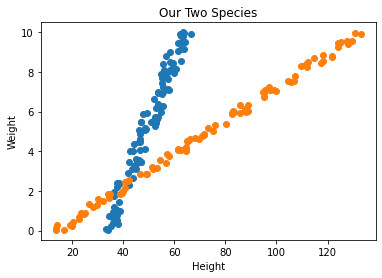

In [17]:
fig, ax = plt.subplots(1)
ax.scatter(df['height'][df['species']], df['weight'][df['species']])
ax.scatter(df['height'][~df['species']], df['weight'][~df['species']])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_title('Our Two Species');

## Standardize axes and Plot

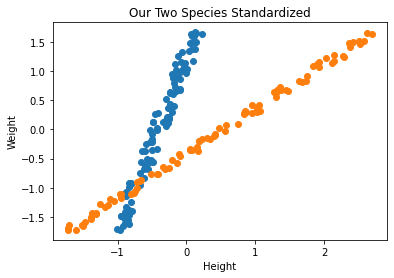

In [32]:
#normalization and standardization is extremely important when dealing with any distance metric 
#Especially if we are dealing with different units. Like inches and pounds. 
X = SS().fit_transform(df[['height','weight']])

fig, ax = plt.subplots(1)
plt.scatter(X[df['species']][:,0], X[df['species']][:,1])
plt.scatter(*X[~df['species']].T)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_title('Our Two Species Standardized');




## Build a KNN Model on standardized data

In [33]:
#basic build of model
model = KNeighborsClassifier(1)

#fit your KNN (this just stores the data, ready to compare distances to each point stored)
model.fit(X,df['species'])

KNeighborsClassifier(n_neighbors=1)

## Predict over a grid of data

In [42]:
# X # weight & height normalized
model.predict([[0.03,0.05]])
# np.array([[0.03,0.05]]).shape

array([False])

In [44]:
#create 100 x_axis points and y_axis points to predict (for each xx, predict all yy to get a filled in graph)
xx = np.linspace(X[:,0].min(),X[:,0].max(), 100)
yy = np.linspace(X[:,1].min(),X[:,1].max(), 100)
predictions = []
xs, ys = [],[]
for x in xx:
    for y in yy:
        predictions.append(model.predict([[x,y]])[0])
        xs.append(x)
        ys.append(y)
predictions = np.array(predictions)
predictions[:5]

array([False, False, False, False, False])

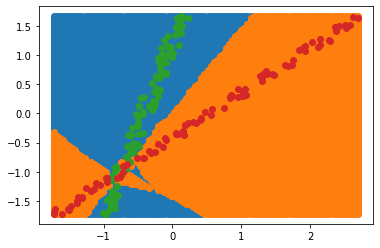

In [46]:
plt.scatter(np.array(xs)[predictions], np.array(ys)[predictions])
plt.scatter(np.array(xs)[~predictions], np.array(ys)[~predictions])
plt.scatter(*X[df['species']].T)
plt.scatter(*X[~df['species']].T);

### More Typical Example without the visual

The above example is a clear and created KNN model mixed with a visual to aid in the understanding of the topic. However, this is not a typical use of the KNN model. Usually we have more than two features with which to predict. Here is another KNN classification example using the Iris Dataset that is built in with Sklearn. 

In [47]:
#load Iris Data
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['class'])
iris_df = df.copy().sample(frac = 1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
92,5.8,2.6,4.0,1.2,1.0
126,6.2,2.8,4.8,1.8,2.0
68,6.2,2.2,4.5,1.5,1.0
142,5.8,2.7,5.1,1.9,2.0
50,7.0,3.2,4.7,1.4,1.0


In [55]:
load_iris().data.shape

(150, 4)

In [58]:
np.c_[iris['data'], iris['target']][:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [59]:
known_data = iris_df.iloc[:120, :]
unknown_data = iris_df.iloc[120:, :]

In [60]:
target = known_data.pop('class')
features = known_data.values

In [64]:
target[:5], features[:5], iris_df[:5], known_data[:5]

(92     1.0
 126    2.0
 68     1.0
 142    2.0
 50     1.0
 Name: class, dtype: float64,
 array([[5.8, 2.6, 4. , 1.2],
        [6.2, 2.8, 4.8, 1.8],
        [6.2, 2.2, 4.5, 1.5],
        [5.8, 2.7, 5.1, 1.9],
        [7. , 3.2, 4.7, 1.4]]),
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 92                 5.8               2.6                4.0               1.2   
 126                6.2               2.8                4.8               1.8   
 68                 6.2               2.2                4.5               1.5   
 142                5.8               2.7                5.1               1.9   
 50                 7.0               3.2                4.7               1.4   
 
      class  
 92     1.0  
 126    2.0  
 68     1.0  
 142    2.0  
 50     1.0  ,
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 92                 5.8               2.6                4.0               1.2
 126                6

In [65]:
#create your model with all hyper parameters
model = KNeighborsClassifier(3)

#fit model to your specific data
model.fit(features, target) # (X, y)

KNeighborsClassifier(n_neighbors=3)

In [66]:
#predict from your model on unseen data... More about this soon
predictions = model.predict(unknown_data.iloc[:, :-1].values)

In [67]:
#take a look at the predicted classes
predictions

array([2., 0., 2., 1., 0., 1., 0., 1., 0., 0., 0., 1., 2., 2., 0., 1., 0.,
       2., 2., 2., 2., 1., 2., 2., 0., 2., 2., 0., 2., 1.])

In [68]:
#Actual classes they should have been... now we can compare and see how good our model is
unknown_data.iloc[:, -1].values

array([2., 0., 2., 1., 0., 1., 0., 1., 0., 0., 0., 1., 2., 1., 0., 1., 0.,
       2., 2., 2., 2., 1., 2., 2., 0., 2., 2., 0., 2., 1.])

In [69]:
predictions == unknown_data.iloc[:, -1].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])